# Q1: Logit Model for Credit Grant Outcome use case
A group of 20 customers possess portfolio ranging from 0.5 to 6.5 million USD in one of the largest Financial Services majors in South America. As an analyst you are tasked to find out how the portfolio amount affect the probability of a customer getting a credit grant? 

Please refer to the dataset provided in GitHub - CreditGrantOutcome.csv.
Portfolio Value is given in million USD = X; And Credit Grant Decision = y which is either 0 or 1, i.e. 1 for getting a grant.

 1) Find out the Odds ratio for every customer data that is captured here. What is the Odds ratio when Portfolio Value X = 2 m USD?
 
2) Find out optimum values of coefficients beta_0 and beta_1?

In [7]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math

df = pd.read_csv("CreditGrantOutcome.csv")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PortfolioValue       20 non-null     float64
 1   CreditGrantDecision  20 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 448.0 bytes


In [12]:
print(df.isnull().sum())

PortfolioValue         0
CreditGrantDecision    0
dtype: int64


In [4]:
df

,PortfolioValue,CreditGrantDecision
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


In [14]:
# Defining the dependent and independent variables
X=df["PortfolioValue"]
Y=df["CreditGrantDecision"]

# Add constant term

X_const = sm.add_constant(X, prepend=False)
# Building the model and fitting the data

logit_model=sm.Logit(Y, X_const).fit()

Optimization terminated successfully.
         Current function value: 0.401494
         Iterations 7


In [15]:
print(logit_model.summary())

                            Logit Regression Results                           
Dep. Variable:     CreditGrantDecision   No. Observations:                   20
Model:                           Logit   Df Residuals:                       18
Method:                            MLE   Df Model:                            1
Date:                 Wed, 14 Sep 2022   Pseudo R-squ.:                  0.4208
Time:                         14:31:34   Log-Likelihood:                -8.0299
converged:                        True   LL-Null:                       -13.863
Covariance Type:             nonrobust   LLR p-value:                 0.0006365
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
PortfolioValue     1.5046      0.629      2.393      0.017       0.272       2.737
const             -4.0777      1.761     -2.316      0.021      -7.529      -0.626


In [ ]:
 You will get the coefficients such as beta_0 and beta_1 etc. You can use that to compute Odds Ratio which is
nothing but exp(beta_0 + beta_1 * X1 + beta_2 * X2 + ....) 
    
    source : https://www.andrewvillazon.com/logistic-regression-python-statsmodels/

In [10]:
b1=1.504645
bo= -4.077713
X=2 #(or shoud I predict the probabiliy for this value in the model?)
Odds = math.exp(bo+ b1*X)
print (Odds)

0.34354986859388575


In [22]:
print(logit_model1.params)

Intercept        -4.077713
PortfolioValue    1.504645
dtype: float64


# Question 2
## Confusion Matrix Scenario
You are working on a binary classification model to predict which devices are going to fail or not fail in the
future.
What is the accuracy of your model given the confusion matrix below? (Rounded to 1 place after decimal)
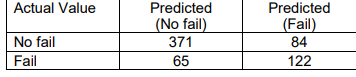



In [2]:
#Accuracy = the percentage of correct predictions 
Accuracy = round ((371+122)/(371+84+65+122),1)

print (Accuracy)

#precision = 122/(122+4)
#recall = 122/(65+122)

0.8


# Q3: Logit/GLM Model for Insurance Cross Sell use case
The insurance major is interested to understand the cross-sell opportunities by analysing the information it
has. As a Data Scientist, you have access to the Insurance Cross Sell data. 

(Please refer to GitHub - InsuranceCrossSell.csv).

The description of variables are as follows (for your reference):

• Response is the binary outcome which indicates whether customer has taken the insurance or not. 1 if insurance taken Else 0.
• Other predictor variables are as follows: Gender, Age, Driving_License, Region_Code etc.
o Gender of customer
o Age of customer
o Driving_License (DL) – 1 if customer has DL, else 0
o Region_Code – location code to which customer belongs
o Previously_Insured – 1 if customer has prior insurance
o Vehicle_Age – 3 categories: <1 year, 1-2 year, >2 years
o Vehicle_Damage – whether there has been damage to the vehicle owned by the customer or
not. 1 if there is damage in the past.
o Annual_Premium – amount paid by customer
o Policy_Sales_Channel – code of the channel through which the policy is being sold
o Vintage – number of days customer is associated with the insurance
Fit a model (using Logit or GLM) and explain significance of predictors on the "Response" decision

In [64]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [69]:
Insurance_df = pd.read_csv("InsuranceCrossSell.csv")
Insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [71]:
Insurance_df.sample(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
295286,295287,Male,24,1,16.0,1,< 1 Year,No,28208.0,152.0,27,0
208346,208347,Female,28,1,10.0,0,< 1 Year,Yes,29640.0,152.0,238,0


In [ ]:
#Object predictors to encode Gender,  Vehicle_Age  Vehicle_Damage

In [8]:
print(Insurance_df.isnull().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


In [17]:
Insurance_df["Vehicle_Age"].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [18]:
Insurance_df["Vehicle_Damage"].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [39]:
#encode non numerical variables with label encoding 
# is wrong to use label encoder in this way ? rather than using dummies like I did below ?
# I will fit the model with labe encoding then fiit again with dummies encoding 
# which one is the correct or better option ? 
label_encoder = LabelEncoder()
cols = ["Gender", "Vehicle_Age", "Vehicle_Damage"]
Insurance_df[cols] = Insurance_df[cols].apply(LabelEncoder().fit_transform)

Insurance_df.sample(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
13905,13906,0,28,1,45.0,0,1,1,29228.0,152.0,86,1
278652,278653,1,45,1,28.0,0,0,1,40637.0,26.0,112,0


In [40]:
Insurance_df.drop(columns='id', inplace=True)


In [41]:
Insurance_df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [42]:
Y = Insurance_df['Response']
X = Insurance_df.drop(columns='Response')
X = sm.add_constant(X)

In [43]:
# Fit the logit model
logit_model = sm.Logit(Y,X)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.279714
         Iterations 11


In [44]:
print(result.summary2())

                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.248      
Dependent Variable:  Response          AIC:               213225.1622
Date:                2022-09-15 09:48  BIC:               213344.5215
No. Observations:    381109            Log-Likelihood:    -1.0660e+05
Df Model:            10                LL-Null:           -1.4177e+05
Df Residuals:        381098            LLR p-value:       0.0000     
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      11.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
const                -4.1305   0.1699 -24.3071 0.0000 -4.4636 -3.7975
Gender                0.1292   0.0110  11.7386 0.0000  0.1076  0.1508
Age                  -0.0061   0.0004 -14.2523 0

In [ ]:
From the first fit we see that all the predictors except Region_Code  and  Vintage   are not significant 

In [ ]:
# for further explaination to explain significance of predictors on the "Response"  decision we will do the wald's Test
#We will look for  variable that  have p-value corresponding to the Wlad's test >0.05.
#We will remove those and retrain the model.

In [45]:
def get_significant_vars(model, alpha=0.05):
    
    #store the variable and p-values in a dataframe
    p_vals = pd.DataFrame(model.pvalues)  
    p_vals['vars'] = p_vals.index
    p_vals.columns = ['pval', 'name']
    
    #return those that are significant at alpha value
    return list(p_vals[p_vals.pval <= alpha]['name'])

In [47]:
significant_vars = get_significant_vars(result)

In [48]:
# Fit the logit model
X_new = X[significant_vars] #constant is already added          

logit_model = sm.Logit(Y,X_new)
final_model = logit_model.fit()
print(final_model.summary2())

Optimization terminated successfully.
         Current function value: 0.279714
         Iterations 11
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.248      
Dependent Variable:  Response          AIC:               213221.3372
Date:                2022-09-15 10:08  BIC:               213318.9947
No. Observations:    381109            Log-Likelihood:    -1.0660e+05
Df Model:            8                 LL-Null:           -1.4177e+05
Df Residuals:        381100            LLR p-value:       0.0000     
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      11.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
const                -4.1356   0.1693 -24.4299 0.0000 -4.4674 -3.8038
Gender         

In [ ]:
with the wald test the predictors that are not significant are removed same as in the model. 

I will run   the wald test again with the use of dummies encoding anf=d compare the output. 

In [72]:
#encoding with dummies
Insurance_df_dummies = pd.get_dummies(data=Insurance_df, columns=cols,drop_first = True)
Insurance_df_dummies.drop(columns='id', inplace=True)
Insurance_df_dummies.sample(5)

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
250593,47,1,50.0,1,42180.0,8.0,281,0,1,0,0,0
99798,45,1,28.0,0,35263.0,124.0,267,0,0,0,0,1
9916,37,1,28.0,0,76333.0,124.0,254,1,1,0,0,1
191748,22,1,8.0,0,42861.0,160.0,83,0,1,1,0,1
80763,38,1,28.0,1,36644.0,122.0,224,0,0,0,0,0


In [73]:
Y= Insurance_df_dummies['Response']
X = Insurance_df_dummies.drop(columns='Response')
X = sm.add_constant(X)

In [74]:
Y.sample (5)

190157    0
147308    0
42811     0
79325     0
24607     0
Name: Response, dtype: int64

In [75]:
X.sample(5)

,const,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
163031,1.0,43,1,8.0,0,35541.0,7.0,183,0,0,0,1
140600,1.0,29,1,17.0,0,54433.0,152.0,90,0,1,0,1
93323,1.0,40,1,33.0,1,30335.0,152.0,61,0,0,0,0
240231,1.0,44,1,28.0,0,29781.0,26.0,136,1,0,0,1
286,1.0,24,1,10.0,1,35443.0,152.0,45,1,1,0,0


In [76]:
logit_model2 = sm.Logit(Y,X)
result2 = logit_model2.fit()

Optimization terminated successfully.
         Current function value: 0.274858
         Iterations 11


In [77]:
 print(result2.summary2())

                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.261      
Dependent Variable:   Response          AIC:               209525.9613
Date:                 2022-09-15 10:24  BIC:               209656.1714
No. Observations:     381109            Log-Likelihood:    -1.0475e+05
Df Model:             11                LL-Null:           -1.4177e+05
Df Residuals:         381097            LLR p-value:       0.0000     
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       11.0000                                         
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
const                 -2.8979   0.1714 -16.9093 0.0000 -3.2338 -2.5620
Age                   -0.0253   0.0005 -46.4495 0.0000 -0.0264 -0.0243
Driving_License        1.2113   0.

In [78]:
def get_significant_vars(model, alpha=0.05):
    
    #store the variable and p-values in a dataframe
    p_vals = pd.DataFrame(model.pvalues)  
    p_vals['vars'] = p_vals.index
    p_vals.columns = ['pval', 'name']
    
    #return those that are significant at alpha value
    return list(p_vals[p_vals.pval <= alpha]['name'])

In [79]:
significant_vars = get_significant_vars(result2)

In [81]:
# Fit the logit model
X_new = X[significant_vars] #constant is already added          

logit_model = sm.Logit(Y,X_new)
final_model = logit_model.fit()
print(final_model.summary())

Optimization terminated successfully.
         Current function value: 0.274859
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:               381109
Model:                          Logit   Df Residuals:                   381099
Method:                           MLE   Df Model:                            9
Date:                Thu, 15 Sep 2022   Pseudo R-squ.:                  0.2611
Time:                        10:26:43   Log-Likelihood:            -1.0475e+05
converged:                       True   LL-Null:                   -1.4177e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.9085      0.171    -17.038      0.000      -3.243      -2

In [ ]:
The result is still consistent vintage an Region_Code  are not good predictors of response. 